In [ ]:
import yfinance as yf
import os
import pandas as pd

!pip install yfinance

# Define the ticker symbol for Apple Inc.
ticker_symbol = "AAPL"

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get historical prices for this ticker, here we're using a 1-year period for simplicity
ticker_df = ticker_data.history(period="max")  # You can adjust the period as per your requirements

# Display the first few rows to confirm we have the data
print(ticker_df.head())


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.099319  0.099750  0.099319  0.099319  469033600   
1980-12-15 00:00:00-05:00  0.094569  0.094569  0.094137  0.094137  175884800   
1980-12-16 00:00:00-05:00  0.087659  0.087659  0.087228  0.087228  105728000   
1980-12-17 00:00:00-05:00  0.089387  0.089818  0.089387  0.089387   86441600   
1980-12-18 00:00:00-05:00  0.091978  0.092410  0.091978  0.091978   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
ticker_df.to_csv('aapl_stock_data.csv')

# Load the data from the CSV file
loaded_df = pd.read_csv('aapl_stock_data.csv')

# Display the loaded data
print(loaded_df.head())


                        Date      Open      High       Low     Close  \
0  1980-12-12 00:00:00-05:00  0.099319  0.099750  0.099319  0.099319   
1  1980-12-15 00:00:00-05:00  0.094569  0.094569  0.094137  0.094137   
2  1980-12-16 00:00:00-05:00  0.087659  0.087659  0.087228  0.087228   
3  1980-12-17 00:00:00-05:00  0.089387  0.089818  0.089387  0.089387   
4  1980-12-18 00:00:00-05:00  0.091978  0.092410  0.091978  0.091978   

      Volume  Dividends  Stock Splits  
0  469033600        0.0           0.0  
1  175884800        0.0           0.0  
2  105728000        0.0           0.0  
3   86441600        0.0           0.0  
4   73449600        0.0           0.0  


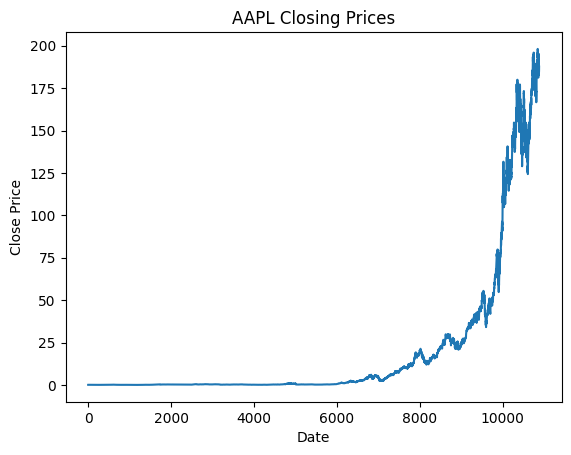

In [ ]:
# Plotting the closing prices
import matplotlib.pyplot as plt

loaded_df['Close'].plot(title="AAPL Closing Prices")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
# Shift the closing price forward by one day to create the target variable
loaded_df['Target'] = loaded_df['Close'].shift(-1)

# Display to check the new column
print(loaded_df[['Close', 'Target']].head())


      Close    Target
0  0.099319  0.094137
1  0.094137  0.087228
2  0.087228  0.089387
3  0.089387  0.091978
4  0.091978  0.097591


In [ ]:
# Calculate moving averages as additional features
loaded_df['7_day_MA'] = loaded_df['Close'].rolling(window=7).mean()
loaded_df['30_day_MA'] = loaded_df['Close'].rolling(window=30).mean()

# Check the new features
print(loaded_df[['Close', '7_day_MA', '30_day_MA']].tail())


            Close    7_day_MA   30_day_MA
10872  188.039993  192.847140  190.120999
10873  184.399994  191.491425  189.681999
10874  186.860001  190.302854  189.380999
10875  185.850006  189.067141  189.011332
10876  187.679993  188.139997  188.772999


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dropping rows with NaN values to clean our data
data_clean = loaded_df.dropna()

# Defining our features and target
X = data_clean[['Close', '7_day_MA', '30_day_MA']]  # Features
y = data_clean['Target']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.6829313842267417


R-squared: 0.9996144583272562


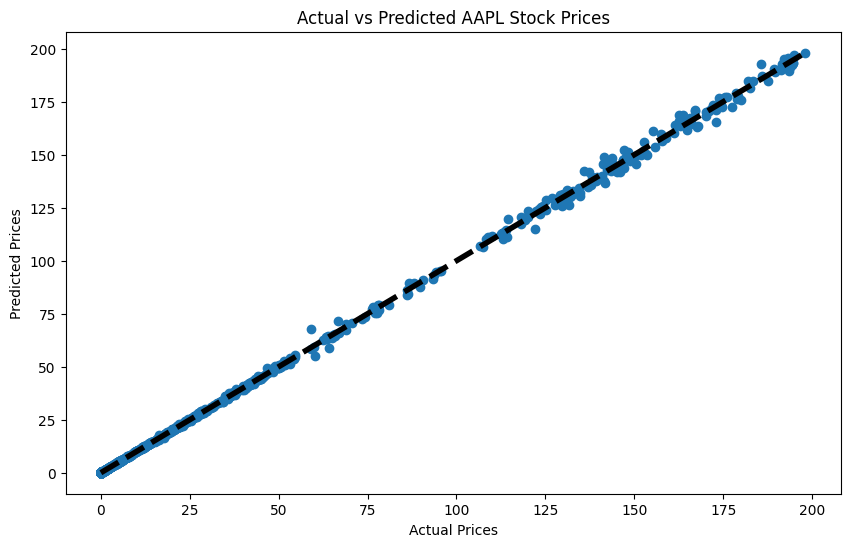

In [ ]:
from sklearn.metrics import r2_score

# Calculating R-squared value for a better understanding of model performance
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted AAPL Stock Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [ ]:
import numpy as np

# Calculate RSI
def RSI(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

# Calculate MACD
def MACD(series, fast_period=12, slow_period=26, signal_period=9):
    exp1 = series.ewm(span=fast_period, adjust=False).mean()
    exp2 = series.ewm(span=slow_period, adjust=False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal_line

# Historical Volatility
def historical_volatility(series, period=30):
    return series.pct_change().rolling(window=period).std() * np.sqrt(period)

# Adding features to the DataFrame
data_clean['RSI'] = RSI(data_clean['Close'])
macd, signal_line = MACD(data_clean['Close'])
data_clean['MACD'] = macd
data_clean['MACD_Signal'] = signal_line
data_clean['Volume_Indicator'] = data_clean['Volume'].rolling(window=7).mean()
data_clean['Historical_Volatility'] = historical_volatility(data_clean['Close'])

# Dropping rows with NaN values to clean our data after adding new features
data_clean.dropna(inplace=True)

# Display the DataFrame to check the new features
print(data_clean[['RSI', 'MACD', 'MACD_Signal', 'Volume_Indicator', 'Historical_Volatility']].head())


          RSI      MACD  MACD_Signal  Volume_Indicator  Historical_Volatility
59  28.888569 -0.004260    -0.004078        14617600.0               0.194288
60  30.952566 -0.004911    -0.004244        17203200.0               0.196183
61  41.249435 -0.005124    -0.004420        23356800.0               0.202055
62  37.974381 -0.005301    -0.004596        54441600.0               0.200222
63  46.835701 -0.005138    -0.004705        58992000.0               0.200236


<ipython-input-9-d7887194fd3c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['RSI'] = RSI(data_clean['Close'])
<ipython-input-9-d7887194fd3c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['MACD'] = macd
<ipython-input-9-d7887194fd3c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i